In [5]:
##Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
##Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [6]:
df=pd.read_csv('student.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
####Preparing X and Y variables

In [9]:
X=df.drop(columns=['math_score'],axis=1)

In [10]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [11]:
print('Categories in gender:',end='')
print(df['gender'].unique())
print('Categories in race_ethnicity:',end='')
print(df['race_ethnicity'].unique())
print('Categories in parental_level_of_education:',end='')
print(df['parental_level_of_education'].unique())
print('Categories in lunch:',end='')
print(df['lunch'].unique())

Categories in gender:['female' 'male']
Categories in race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:['standard' 'free/reduced']


In [12]:
Y=df['math_score']

In [13]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [14]:
##create column transformer with 3 types of transformer
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(

    [
        ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",num_transformer,num_features)
    ]
)

In [15]:
X=preprocessor.fit_transform(X)


In [16]:
X.shape

(1000, 19)

In [17]:
##Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [18]:
##Create an evaluate function to return all the metrics after model training

In [19]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [24]:
models={
    "Linear Regression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "K Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGB Regressor":XGBRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor(),
    "CatBoost Regressor":CatBoostRegressor()


}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)##Train model



    ##Make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    ##Evaluate Train and Test dataset

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(Y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(Y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print("-Root mean squared error:{:.4f}".format(model_train_rmse))
    print("-Mean absolute error:{:.4f}".format(model_train_mae))
    print("-R2_score:{:.4f}".format(model_train_r2))
    

    print('-----------------------------------------------------')
    print("-Model performance for test set ")
    print("-Root mean squared error:{:.4f}".format(model_test_rmse))
    print("-Meanabsolute error:{:.4f}".format(model_test_mae))
    print("-R2_score:{:.4f}".format(model_test_r2))


    r2_list.append(model_test_r2)


             

Linear Regression
Model performance for training set
-Root mean squared error:5.3244
-Mean absolute error:4.2671
-R2_score:0.8743
-----------------------------------------------------
-Model performance for test set 
-Root mean squared error:5.3960
-Meanabsolute error:4.2158
-R2_score:0.8803
Ridge
Model performance for training set
-Root mean squared error:5.3233
-Mean absolute error:4.2650
-R2_score:0.8743
-----------------------------------------------------
-Model performance for test set 
-Root mean squared error:5.3904
-Meanabsolute error:4.2111
-R2_score:0.8806
Lasso
Model performance for training set
-Root mean squared error:6.5938
-Mean absolute error:5.2063
-R2_score:0.8071
-----------------------------------------------------
-Model performance for test set 
-Root mean squared error:6.5197
-Meanabsolute error:5.1579
-R2_score:0.8253
K Neighbors Regressor
Model performance for training set
-Root mean squared error:5.7077
-Mean absolute error:4.5167
-R2_score:0.8555
-----------

In [ ]:
Results

In [25]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model_name,R2_score
1,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.855938
8,CatBoost Regressor,0.851632
7,AdaBoost Regressor,0.850642
6,XGB Regressor,0.827797
2,Lasso,0.825320
3,K Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.727067


Linear Model


In [26]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,Y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(Y_test,y_pred)*100
print("accuracy of the model is %.2f" %score)

accuracy of the model is 88.03


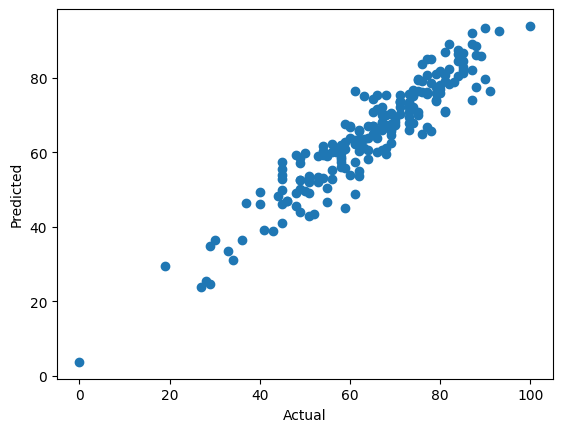

In [28]:
plt.scatter(Y_test,y_pred);
plt.xlabel("Actual");
plt.ylabel("Predicted");

<Axes: xlabel='math_score'>

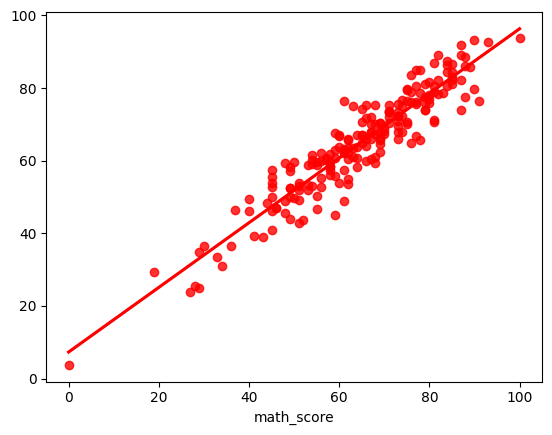

In [31]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color='red')

In [32]:
pred_df=pd.DataFrame({'Actual_value':Y_test,'Predicted_value':y_pred,'Difference':Y_test-y_pred})

In [34]:
pred_df.head()

,Actual_value,Predicted_value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
